# Ejercicio 5

## Ítem a - Thinning

Se utiliza para "afinar" la región *foreground* de tal forma que su extensión y conectividad se mantenga. Preservar la extensión significa preservar los puntos terminales que caracterizan a la estructura, mientras que preservar la conectividad puede referirse a conexiones 4-conexas o 8-conexas (teniendo en cuenta los pixels circundantes al que se está procesando)

*Thinning* es principalmente utilizado para producir "esqueletos" de imágenes que sirven para describirlas, o para reducir el output de *edge-detectors* a un pixel de ancho.

La operación de *Thinning* puede ser implementada mediante una de las siguientes opciones:
- Zhang Suen fast parallel thinning algorithm
- Non-max Suppression in Canny Edge Detector
- Guo and Hall's two sub-iteration parallel thinning algorithm
- Algoritmos iterativos que utilizan operaciones morfológicas (como por ejemplo, hit-or-miss, opening y erosion)

Para este ejemplo se utilizará la última variante, con operaciones de erosion y opening

In [166]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Se crea una imagen con texto en ella

In [167]:
img = np.zeros((100, 1000), dtype='uint8')
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, 'Procesamiento de imagenes', (5,70), font, 2, (255), 5, cv2.LINE_AA)
img_aux = img.copy()

Se crea la imagen original

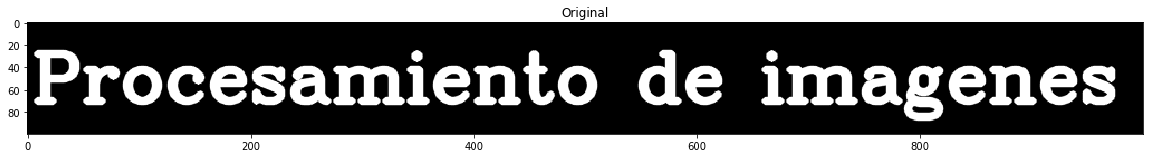

In [168]:
fig = plt.figure(figsize=(20, 20))
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.show()

Se crea el kernel y un arreglo para la salida

In [169]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
thin = np.zeros(img.shape, dtype='uint8')

Se realizan las iteraciones de thinning

In [170]:
while (cv2.countNonZero(img_aux) != 0):
    # Erosion
    erode = cv2.erode(img_aux, kernel)
    # Opening on eroded image
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, kernel)
    # Substract these two
    subset = erode - opening
    # Union of all previous sets
    thin = cv2.bitwise_or(subset, thin)
    # Set the eroded image for next iteration
    img_aux = erode.copy()

Y la imagen resultante es...

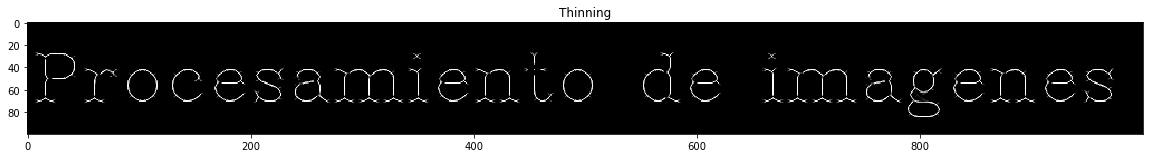

In [177]:
fig = plt.figure(figsize=(20, 20))
plt.imshow(thin, cmap='gray')
plt.title('Thinning')
plt.show()

## Ítem b - Thickening

El caso the *Thickening* consiste en un complemento de *Thinning*, que se puede lograr mediante aplicar *Thinning* al fondo de una imagen (o a su complemento).

In [174]:
thick = img.copy()
cnts = cv2.findContours(thick, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    cv2.drawContours(thick, [c], -1, (255, 255, 255), thickness=8)

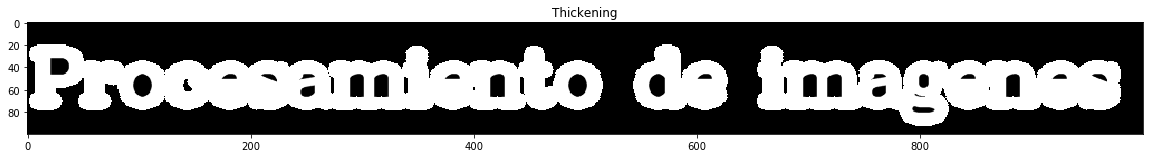

In [176]:
fig = plt.figure(figsize=(20, 20))
plt.imshow(thick, cmap='gray')
plt.title('Thickening')
plt.show()

Resultados finales de *Thinning* y *Thickening*

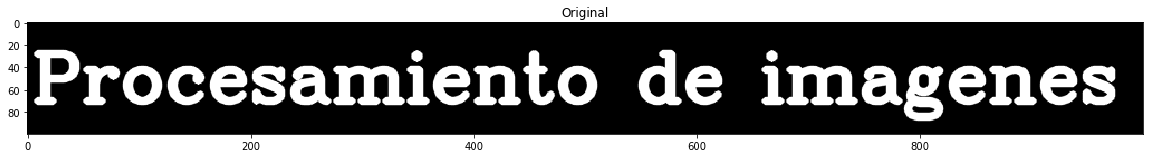

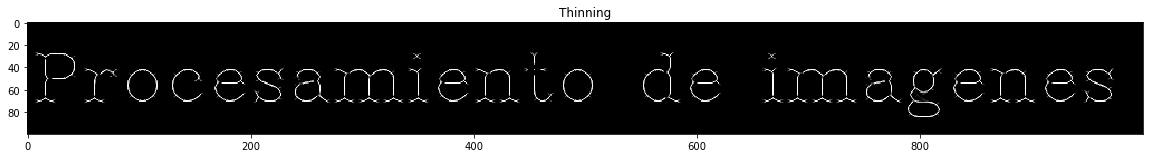

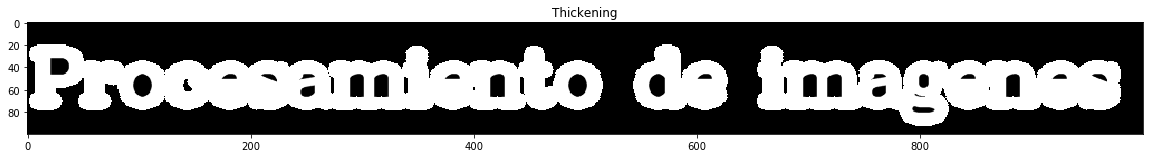

In [178]:
fig = plt.figure(figsize=(20, 20))
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.show()

fig = plt.figure(figsize=(20, 20))
plt.imshow(thin, cmap='gray')
plt.title('Thinning')
plt.show()

fig = plt.figure(figsize=(20, 20))
plt.imshow(thick, cmap='gray')
plt.title('Thickening')
plt.show()